# Modelos Lineales

Los modelos lineales son una clase de modelos que se utilizan ampliamente en la practica y se han estudiado ampliamente en las ultimas decadas. Los modelos lineales hacen una prediccion utilizando una funcion lineal de las caracteristicas de entrada.

## Modelos lineales para la regresion

Para la regresion, la formula de prediccion general para un modelo lineal es la siguiente:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

En esta formula desde x[0] hasta x[p] son las caracteristicas de 1 solo punto de datos mientras que w y b son los parametros del modelo que se aprenden, y ŷ es la prediccion que hara el modelo.

Para un conjunto de datos con una sola caracteristica esta formula seria:

ŷ = w[0] * x[0] + b

w[0] es la pendiente y b es el desplazamiento del eje y. Para mas caracteristicas w contiene las pendientes de cada caracteristica.

Intentar aprender los parametros w[0] y b en nuestro conjunto de datos de ondas unidimensionales podria llevar a la siguiente linea.

w[0]: 0.393906  b: -0.031804


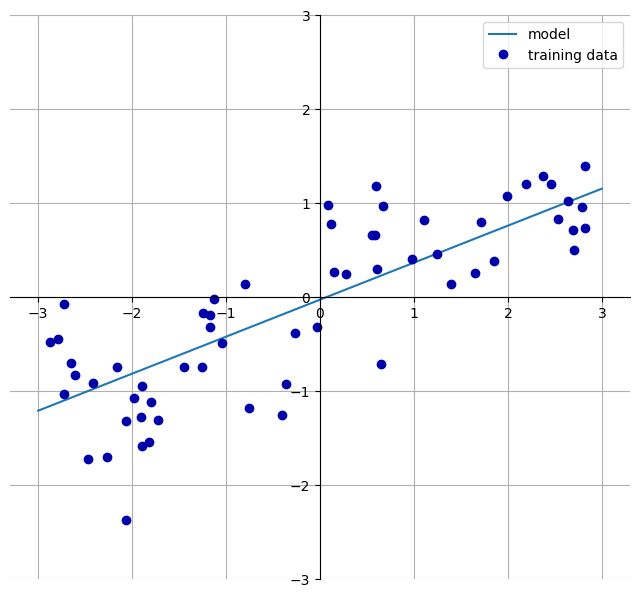

In [1]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

Modelos lineales mas populares para la regresion.

### Regresion lineal (tambien conocida como minimos cuadrados ordinarios)

- Es el metodo mas simple y clasico para la regresion. La regresion lineal encuentra los parametros w y b que minimizan el error cuadratico medio entre las predicciones y los objetivos de regresion verdaderos, y, en el conjunto de entrenamiento.
- *El error cuadratico medio es la suma de las diferencias al cuadrado entre las predicciones y los valores verdaderos.*
- La regresion lineal no tiene parametros, lo cual es una ventaja, pero tampoco tiene forma de controlar la complejidad del modelo.

Ahora reproduzcamos el modelo del grafico anterior.

In [2]:
import mglearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

Los parametros de **pendiente** (w), tambien llamados pesos o coeficientes, se almacenan en el atributo coef_, mientras que el **desplazamiento** o interseccion (b) se almacena en el atributo intercept_.

In [3]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Scikit-learn siempre almacena todo lo que se deriva de los datos de entrenamiento en atributos que terminan con un guion bajo final.

El atributo intercept_ siempre es un unico numero flotante mientras que el atributo coef es una matriz de Numpy con un elemento por caracteristica de entrada.

In [4]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Un R2 de alrededor de 0.66 es bajo, esto significa que se esta subajustando.
En un conjunto de datos con muchas caracteristicas los modelos lineales se vuelven mas potentes y aumenta la probabilidad de sobreajuste.
Probemos con un conjunto de datos mas complejo: Boston Housing.
Este conjunto tiene 506 muestras y 105 caracteristicas derivadas.

In [5]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Al comparar las puntuaciones de la serie de entrenamiento y la serie de prueba, encontramos que predecimos con mucha precision, en el conjunto de entrenamiento, pero el R2 en el conjunto de prueba es mucho peor.

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Esta discrepancia entre el set de entrenamiento y el set de prueba es una clara señal de sobreajuste por lo que debemos buscar un modelo que nos permita controlar la complejidad. Una de las alternativas mas utilizadas es la regresion de cresta.

### Regresion de cresta

La regresion de cresta tambien es un modelo de regresion lineal, por lo que la formula que se utiliza para hacer predicciones es la misma que se utiliza para los minimos cuadrados ordinarios.

Sin embargo, en la regresion de cresta, los coeficientes(w) se eligen no solo para que predigan bien los datos de entrenamiento, sino tambien para que se ajusten a una restriccion adicional.
Tambien buscamos que la magnitud de los coeficientes sea lo mas pequeña posible. En otras palabras que los coeficientes esten los mas cerca posible a cero.
Intuitivamente esto significa que cada caracteristica debe tener el menor efecto posible en el resultado, sin dejar de predecir bien.

Esta restriccion es un ejemplo de lo que se denomina regularizacion.
La regularizacion significa restringir explicitamente un modelo para evitar el sobreajuste.
El tipo particular utilizado por la regularizacion de cresta se conoce como regularizacion L2.

La regresion de cresta se implementa con linear_model.Ridge.
Comprobemos su funcionamiento con el conjunto de datos extendido de Boston Housing.

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Como se puede observar la puntuacion del conjunto de entrenamiento de Ridge es menor que la de LinearRegression, mientras que la puntuacion del conjunto de pruebas es mayor. Con la regresion lineal, estabamos sobreajustando los datos. Ridge es un modelo mas restringido, por lo que es menos probable que nos sobreajustemos.

Un modelo menos complejo significa un peor rendimiento en el conjunto de entrenamiento, pero una mejor generalizacion. Como solo nos interesa el rendimiento de la generalizacion, debemos elegir el modelo de Ridge sobre el modelo de regresion lineal.

El modelo Ridge hace un compromiso entre simplicidad del modelo (coeficientes cercanos a cero) y su rendimiento en el conjunto de entrenamiento.

El usuario puede especificar la importancia que el modelo concede a la simplicidad frente al rendimiento del conjunto de entrenamiento mediante el parametro alpha.
En el ejemplo anterior usamos el parametro predeterminado alpha = 1.0. Sin embargo no hay razon por la que esto nos de la mejor compensacion.
La configuracion optima de alpha depende del conjunto de datos particular que estemos utilizando.

*El aumento del alfa obliga a los coeficientes a moverse mas hacia cero, lo que disminuye el rendimiento del conjunto de entrenamiento, pero podria ayudar a la generalizacion.*

In [8]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


*La disminucion del alfa permite que los coeficientes esten menos restringidos. Para valores muy pequeños de alfa, los coeficientes apenas estan restringidos, y terminamos con un modelo que se asemeja a LinearRegression.*

In [9]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Aqui alpha = 0.1 parece estar funcionando bien. Prodriamos intentar disminuir el alfa aun mas para mejorar la generalizacion. 

Tambien podemos obtener una vision mas cualitativa de como el parametro alpha cambia el modelo inspeccionando el atributo coef_ de los modelos con diferentes valores de alpha.
Un alpha mas alto significa un modelo mas restringido, por lo que esperamos que las entradas de coef_ tengan una magnitud menor para un valor alto de alfa que para un valor bajo de alfa.

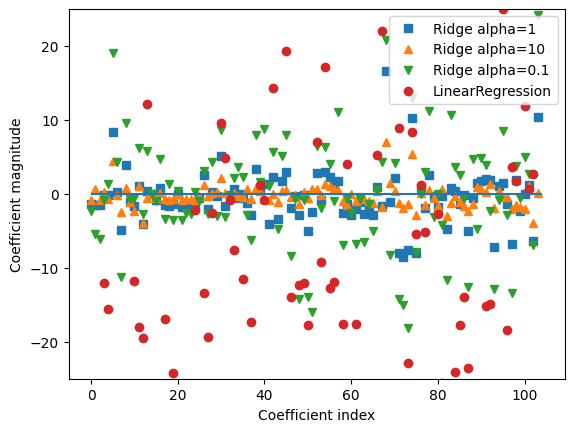

In [10]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Con alpha=10: La regularización es fuerte, lo que hace que la mayoría de los coeficientes se mantengan cerca de cero—entre -3 y 3—, reduciendo así su impacto y simplificando el modelo.

Con alpha=1: La regularización es menos estricta, permitiendo que los coeficientes sean algo mayores.

Con alpha=0.1: La regularización se debilita aún más, y los coeficientes alcanzan valores más altos en magnitud.

Con alpha=0 (lo que equivale a no usar regularización, como en la regresión lineal clásica): Muchos coeficientes se vuelven tan grandes que se salen del rango mostrado en el gráfico.

Tambien se puede cambiar la cantidad de datos que se le proporciona al modelo y fijar un valor de alpha, asi se puede observar como reacciona el modelo al suministrarle mas informacion.

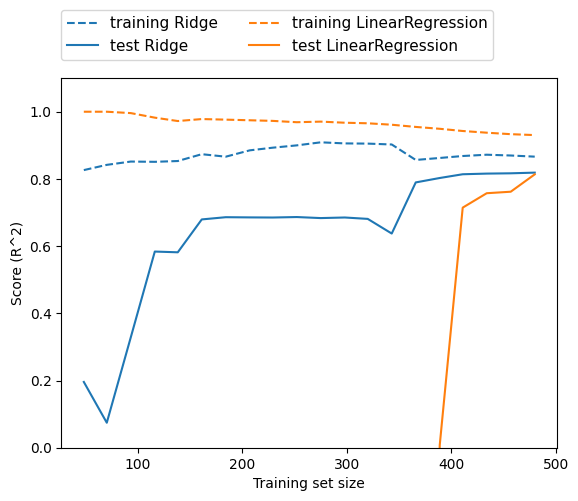

In [11]:
mglearn.plots.plot_ridge_n_samples()

Como se puede observar la puntuacion para el conjunto de entrenamiento es superior que la puntuacion en el conjunto de prueba para ambos modelos y la Regresion Lineal tiene mas puntos que Ridge, sin embargo cuando hay menos de 400 datos, la regresion lineal no puede aprender correctamente mientras que Ridge si presenta resultados de aprendizaje con muy pocos datos.
Por lo que Ridge se presenta muy util cuando se tienen pocos datos.

### Lasso

Una alternativa a Ridge para la regresion lineal. Al igual que con la regresion de cresta, el uso de Lasso tambien restringe los coeficientes para que esten cerca de cero, pero de una menra ligeramente diferente, llamada regularizacion L1.

La consecuencia de la regularizacion L1 es que cuando se usa Lasso, algunos coeficientes son exactamente 0. Esto significa que algunas caracteristicas son completamente ignoradas por el modelo. Esto puede verse como una forma de seleccion automatica de caracteristicas. Hacer que algunos coeficientes sean exactamente 0 a menudo hace que un modelo sea mas facil de interpretar y puede revelar las caracteristicas mas importantes de su modelo.

Apliquemos el lazo al conjunto de datos extendido de Boston Housing:

In [12]:
import numpy as np

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


A Lasso le va bastante mal tanto en el set de entrenamiento como en el set de prueba. Esto indica que estamos subajustando y observamos que uso solo 4 de las 105 caracteristicas.

De manera similar a Ridge, Lasso tiene un parametro de regularizacion, alpha, que controla la fuerza con la que los coeficientes se empujan a 0.

En el ejemplo anterior se uso el valor predeterminado de alpha = 1.0. Para reducir el ajuste insuficiente disminuiremos el alpha. Cuando se hace esto tambien hay que aumentar la configuracion predeterminada de max_iter (el numero maximo de iteraciones al ejecutar).

In [13]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.74
Number of features used: 67


Un alfa mas bajo nos permitio ajustar un modelo mas complejo, que funciono mejor en los datos de entrenamiento y prueba. El rendimiento es ligeramente mejor que con Ridge y estamos usando solo 33 de las 105 caracteristicas. Esto hace que este modelo sea potencialmente mas facil de entender.

Sin embargo, si establecemos un alfa demasiado bajo, volvemos a eliminar el efecto de la regularizacion y terminamos sobreajustando, con un resultado similar a LinearRegression.

In [14]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Una vez más, podemos trazar los coeficientes de los diferentes modelos

Text(0, 0.5, 'Coefficient magnitude')

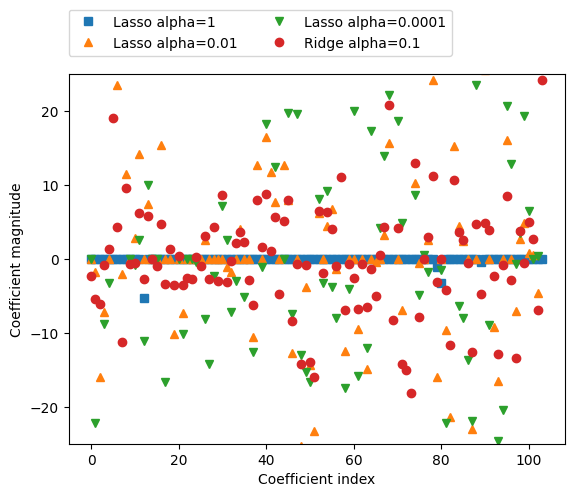

In [15]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Cuando α = 1: La penalización es fuerte. Esto hace que casi todos los coeficientes se vuelvan cero, y los pocos que quedan tienen valores muy pequeños. Es como si el modelo descartara muchas características porque no las “necesita”.

Cuando α disminuye a 0.01: La sanción es menor. Ahora, el modelo sigue dejando muchos coeficientes exactamente en cero (marcados en los puntos verdes), eliminando así las características irrelevantes, pero de forma menos drástica que con α = 1.

Cuando α es muy pequeño (0.00001): La regularización es casi nula. El modelo retiene la mayor parte de las características con coeficientes no nulos y de gran magnitud. Esto significa que el modelo se complica más, lo que podría llevar a un sobreajuste.

En la practica la regresion de cresta suele ser elegida por sobre la regresion de Lasso. Sin embargo, si tiene una gran cantidad de caracteristicas y espera que solo algunas de ellas sean importantes, Lasso podria ser una mejor opcion. Del mismo modo, si desea un modelo que sea facil de interpretar, Lasso proporcionara un modelo que sea mas facil de entender, ya que seleccionara solo un subconjunto de las caracteristicas de entrada.

Scikit-learn tambien proporciona la clase ElasticNet, que combina las penalizaciones de Lasso y Ridge. En la practica esta combinacion funciona mejor, aunque el precio de tener dos parametros que ajustar: uno para la regularizacion L1 y otro para la regularizacion L2.

## Modelos lineales para clasificacion

Los modelos lineales se utilizan ampliamente para la clasificacion. Observaremos primero la clasificacion binaria. En este caso, se realiza una prediccion mediante la siguiente formula

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

La formula es muy similar a la de la regresion lineal, pero en lugar de devolver simplemente la suma ponderada de las caracteristicas, establecemos el umbral del valor predicho en cero. Si la funcion es menor que cero, predecimos la clase -1; si es mayor que cero, predecimos la clase +1. Esta regla de prediccion es comun a todos los modelos lineales de clasificacion. De nuevo, hay muchas maneras diferentes de encontrar los coeficientes (w) y el intercepto (b).

En los modelos lineales de regresion, la salida ŷ, es una funcion lineal de las caracteristicas: una linea, un plano o un hiperplano. En los modelos lineales de clasificacion, el limite de decision es una funcion lineal de entrada. En otras palabras, un clasificador lineal binario separa dos clases mediante una linea, un plano o un hiperplano.

Existen muchos algorimos para aprender modelos lineales. Todos estos algoritmos difieren en los dos apsectos siguientes:
- La forma en que miden el ajuste de una combinacion particular de coeficientes e interseccion a los datos de entrenamiento.
- Si utilizan regularizacion y, en caso afirmativo, que tipo de regularizacion utilizan.

Distintos algoritmos eligen distintas maneras de medir que significa "ajustar correctamente el conjunto de entrenamiento". Por razones tecnicas y matematicas, no es posible ajustar w y b para minimizar el numero de clasificaciones erroneas que producen los algoritmos, como cabria esperar. Para nuestros propositos, y para muchas aplicaciones, las diferentes opciones para el elemento 1 de la lista anterior (denominadas funciones de perdida) son poco significativas.

Los dos algoritmos de clasificacion lineal mas comunes son la regresion logistica, implementada en linear_model.LogisticRegression, y las maquinas de vectores de soporte lineales (SVM lineales), implementadas en svm.LinearSVC (SVC significa clasificador de vectores de soporte). A pesar de su nombre, LogisticRegression es un algoritmo de clasificacion, no de regresion, y no debe confundirse con LinearRegression.

Podemos aplicar los modelos de Regresion Logistica y SVC Lineal al conjunto de datos de Forge y visualizar el limite de decision determinado por los modelos lineales.

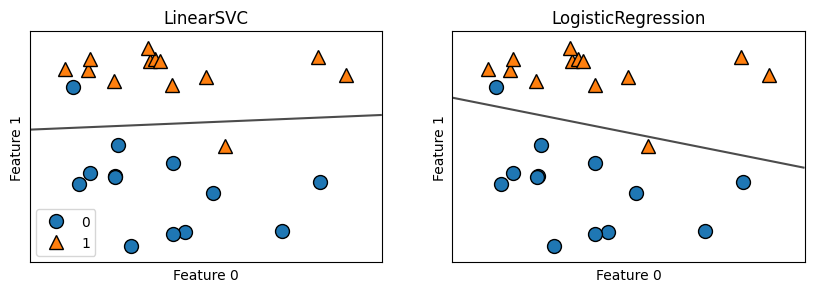

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

En esta figura se muestra como los modelos de clasificacion como LinearSVC y LogisticRegression clasifican cualquier punto de datos que se encuentre por encima de la linea negra sera clasificado como clase 1 por el clasificador respectivo, mientras que cualquier punto que se encuentre por debajo de la linea negra se clasificara como clase 0.

Los dos modelos presentan limites de decision similares. Cabe destacar que ambos clasifican erroneamente dos de los puntos. Por defecto, ambos modelos aplican una regularizacion L2, de la misma forma que Ridge lo hace para la regresion.

Para la Regresion Logistica y la SVC Lineal, el parametro de compensacion que determina la fuerza de la regularizacion se denomina C, y valores mas altos de C tratan de ajustar el conjunto de entrenamiento lo mejor posible, mientras que con valores bajos de C, los modelos se centran mas en encontrar un vector de coeficientes (w) cercanos a cero.

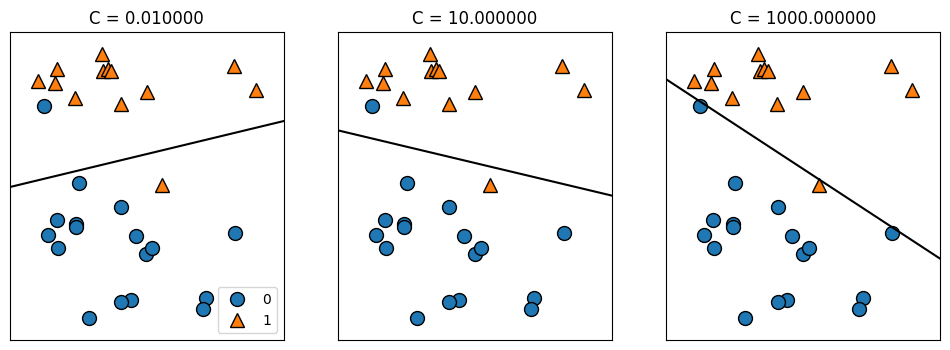

In [17]:
mglearn.plots.plot_linear_svc_regularization()

C = 0.010000 tiene una alta regularizacion, la linea de decision es casi horizontal, lo que resulta en algunos errores de clasificacion, ya que no se ajusta bien a los datos.

C = 10.00000 La linea se inclina para corregir algunos de los errores anteriores, intentando clasificar mejor los puntos, pero aun comete equivocaciones.

C = 1000.000 tiene una baja regularizacion, la linea se inclina de forma significativa para clasificar correctamente la mayoria de los puntos, pero en el proceso puede sobreajustarse a los datos, perdiendo la capacidad de generalizar adecuadamente.

De forma similar al de caso de la regresion, los modelos lineales de clasificacion pueden parecer muy restrictivos en espacios de baja dimension, ya que solo permiten limites de decision que son lineas rectas o planos. De nuevo, en grandes dimensiones, los modelos lineales de clasificacion se vuelven muy eficaces, y la prevencion del sobreajuste cobra cada vez mayor importancia al considerar mas caracteristicas.

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


El valor predeterminado de C=1 proporciona un rendimiento bastante bueno, con un 95% de presicion tanto en el conjunto de entrenamiento como en el conjunto de prueba. Pero dado que el rendimiento en los conjuntos de entrenamiento y prueba son muy cercanos, es probable que estemos subajustando. Intentemos aumentar C para ajustar un modelo mas flexible:

In [19]:
logreg100 = LogisticRegression(C=100, max_iter=30000)
logreg100.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


Usar C=100 resulta en una mayor presicion del conjunto de entrenamiento y tambien en una presicion del conjunto de prueba ligeramente mayor, confirmando nuestra intuicion de que un modelo mas complejo deberia tener un mejor rendimiento.